In [253]:
import numpy as np
import matplotlib.pyplot as plt
import mu_to_p0
import plotly.graph_objs as go
import imageio
import scipy.io as sio

In [254]:
def gauss_density_pattern(xp, yp, zp, amplitude, sigma):
    x, y, z = np.meshgrid(xp, yp, zp)
    x0 = xp.mean()
    y0 = yp.mean()
    z0 = zp.mean()
    density = amplitude * np.exp(-((x - x0)**2 + (y - y0)**2 + (z - z0)**2) / (2 * sigma**2))
    return density

Lx = 10
Ly = 10
Lz = 10

nx = 32
ny = 32
nz = 32

dx = Lx / nx
dy = Ly / ny
dz = Lz / nz

xc = np.linspace(-Lx/2 + dx/2, Lx/2 - dx/2, nx)
yc = np.linspace(-Ly/2 + dy/2, Ly/2 - dy/2, ny)
zc = np.linspace(-Lz/2 + dz/2, Lz/2 - dz/2, nz)

mu = gauss_density_pattern(xc, yc, zc, .5, Lx/10)
mu_background = .2

source = (-10, 0, 0)

P0, a = mu_to_p0.mu_to_p0_isotropic_3d(mu, mu_background, source, dx/2, xc, yc, zc)

### MU


In [255]:
mu_images = []
for zi in range(P0.shape[2]) :
    mu_image = np.zeros((P0.shape[1], P0.shape[0]))
    for yi in range(P0.shape[1]):
        for xi in range(P0.shape[0]):
            mu_image[yi][xi] = mu[xi][yi][zi]
    mu_images.append(mu_image)      
imageio.mimsave('mu.gif', mu_images)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

# P0 ----------------------------------------------------------------  

In [256]:
matlab_filename = "P0.mat"

# Create a dictionary to store the data with a variable name (e.g., 'volume_data')
data_dict = {'P0_volume': P0}

# Save the dictionary as a .mat file
sio.savemat(matlab_filename, data_dict)

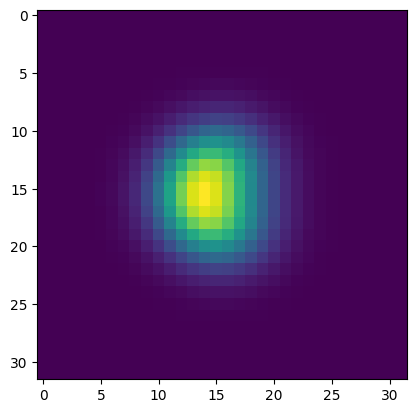

In [273]:
mip = np.max(P0, axis=0)
plt.imshow(mip)

### XY Planes

In [258]:
highlighted_xy_images = []

# Define the source coordinates
source_x, source_y, source_z = source

# Loop through the cross-sectional planes
for zi in range(P0.shape[2]):
    # Create a copy of the P0 cross-section
    xy_image = np.copy(P0[:,:,zi])

    # Calculate the pixel coordinates corresponding to the source location
    source_pixel_x = int((source_x - xc[0]) / dx)
    source_pixel_y = int((source_y - yc[0]) / dy)

    # Set a marker at the source location (e.g., a bright pixel or circle)
    marker_size = 5  # Adjust the marker size as needed
    xy_image[
        source_pixel_y - marker_size : source_pixel_y + marker_size + 1,
        source_pixel_x - marker_size : source_pixel_x + marker_size + 1
    ] = 1.0  # Set the marker pixels to a high value (1.0 for highlighting)

    # Append the modified cross-section to the list
    highlighted_xy_images.append(xy_image)

# Save the GIF with the highlighted source location
imageio.mimsave('XYCrossSectionsWithSource.gif', highlighted_xy_images)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [259]:
xy_images = []
for zi in range(P0.shape[2]) :
    xy_image = np.zeros((P0.shape[1], P0.shape[0]))
    for yi in range(P0.shape[1]):
        for xi in range(P0.shape[0]):
            xy_image[yi][xi] = P0[zi][yi][xi]
    xy_images.append(xy_image) 
imageio.mimsave('XYCrossSections.gif',xy_images)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

### ZY Planes

In [260]:
zy_images = []

for xi in range(P0.shape[0]):
    # Create a 2D image for the ZY plane
    zy_image = np.zeros((P0.shape[2], P0.shape[1]))
    for yi in range(P0.shape[1]):
        for zi in range(P0.shape[2]):
            zy_image[zi][yi] = P0[zi][yi][xi]  
    zy_images.append(zy_image) 
imageio.mimsave('ZYCrossSections.gif', zy_images)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

### XZ Planes

In [261]:
xz_images = []

for yi in range(P0.shape[1]):
    # Create a 2D image for the XZ plane
    xz_image = np.zeros((P0.shape[0], P0.shape[2]))
    for xi in range(P0.shape[0]):
        for zi in range(P0.shape[2]):
            xz_image[zi][xi] = P0[zi][yi][xi]  
    xz_images.append(xz_image) 

# Save XZ plane images as a GIF
imageio.mimsave('XZCrossSections.gif', xz_images)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [262]:
matlab_filename = "P0.mat"
data_dict = {'volume_data': P0}
sio.savemat(matlab_filename, data_dict)

# Fluence ----------------------------------------------------------------

In [263]:
fluence = np.exp(-a)

In [264]:
xy_fluence_images = []
for zi in range(a.shape[2]) :
    xy_fluence_image = np.zeros((a.shape[1], a.shape[0]))
    for yi in range(a.shape[1]):
        for xi in range(a.shape[0]):
            xy_fluence_image[yi][xi] = fluence[zi][yi][xi]   
    xy_fluence_images.append(xy_fluence_image) 
imageio.mimsave('XY_fluenceCrossSections.gif',xy_fluence_images)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [265]:
zy_fluence_images = []
for xi in range(P0.shape[0]):
    # Create a 2D image for the ZY_fluence plane
    zy_fluence_image = np.zeros((P0.shape[2], P0.shape[1]))
    for yi in range(P0.shape[1]):
        for zi in range(P0.shape[2]):
            zy_fluence_image[zi][yi] = fluence[zi][yi][xi]  
    zy_fluence_images.append(zy_fluence_image) 
imageio.mimsave('ZY_fluenceCrossSections.gif', zy_fluence_images)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [266]:
xz_fluence_images = []

for yi in range(P0.shape[1]):
    # Create a 2D image for the XZ_fluence plane
    xz_fluence_image = np.zeros((P0.shape[0], P0.shape[2]))
    for xi in range(P0.shape[0]):
        for zi in range(P0.shape[2]):
            xz_fluence_image[zi][xi] = fluence[zi][yi][xi]  
    xz_fluence_images.append(xz_fluence_image) 

# Save XZ_fluence plane images as a GIF
imageio.mimsave('XZ_fluenceCrossSections.gif', xz_fluence_images)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [267]:
matlab_filename = "fluence.mat"

# Create a dictionary to store the data with a variable name (e.g., 'volume_data')
data_dict = {'volume_data': fluence}

# Save the dictionary as a .mat file
sio.savemat(matlab_filename, data_dict)

# Alpha-----------------------------------------------------------

In [268]:
xy_Alpha_images = []
for zi in range(a.shape[0]) :
    xy_Alpha_image = np.zeros((a.shape[1], a.shape[0]))
    for yi in range(a.shape[1]):
        for xi in range(a.shape[2]):
            xy_Alpha_image[yi][xi] = a[zi][yi][xi]   
    xy_Alpha_images.append(xy_Alpha_image) 
imageio.mimsave('XY_AlphaCrossSections.gif',xy_Alpha_images)

Lossy conversion from float64 to uint8. Range [1.0644608887493823, 1.65625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.064217773437891, 1.6250000000000004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0600306457415016, 1.5937500000000013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0596145655325042, 1.5625000000000049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0591321854224585, 1.531250000000016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0590242956489904, 1.5000000000000462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0428614875225437, 1.500000000000123]. Convert 

In [269]:
zy_Alpha_images = []
for xi in range(a.shape[2]):
    # Create a 2D image for the ZY_Alpha plane
    zy_Alpha_image = np.zeros((a.shape[2], a.shape[1]))
    for yi in range(a.shape[1]):
        for zi in range(a.shape[0]):
            zy_Alpha_image[zi][yi] = a[zi][yi][xi]  
    zy_Alpha_images.append(zy_Alpha_image) 
imageio.mimsave('ZY_AlphaCrossSections.gif', zy_Alpha_images)

Lossy conversion from float64 to uint8. Range [1.0000006189366983, 1.65625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0000032969935435, 1.6250000000000024]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0000113569063043, 1.5625000000000355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0000422989057478, 1.50000000000032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0001313369317435, 1.468750000003527]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0004036111170442, 1.4375000000075162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.00100724465538, 1.4062500000306501]. Convert im

Lossy conversion from float64 to uint8. Range [1.0646167105162099, 2.22204457471686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0648582910916118, 2.222744866950007]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0651763000713985, 2.2229840619153243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0655031786153246, 2.2230581610588476]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.066181618476713, 2.22307898019818]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.066515334172621, 2.2230842853862547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0591321854224585, 2.2230855114900234]. C

In [270]:
xz_Alpha_images = []

for yi in range(P0.shape[1]):
    # Create a 2D image for the XZ_Alpha plane
    xz_Alpha_image = np.zeros((P0.shape[0], P0.shape[2]))
    for xi in range(P0.shape[2]):
        for zi in range(P0.shape[0]):
            xz_Alpha_image[zi][xi] = a[zi][yi][xi]  
    xz_Alpha_images.append(xz_Alpha_image) 

# Save XZ_Alpha plane images as a GIF
imageio.mimsave('XZ_AlphaCrossSections.gif', xz_Alpha_images)

Lossy conversion from float64 to uint8. Range [1.0644608887493823, 1.65625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.064217773437891, 1.6250000000000004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0600306457415016, 1.5937500000000013]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0596145655325042, 1.5625000000000049]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0591321854224585, 1.531250000000016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0590242956489904, 1.5000000000000462]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0428614875225437, 1.500000000000123]. Convert 

Lossy conversion from float64 to uint8. Range [1.0000006824295191, 2.2230855114900234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0000006824295191, 2.2230855114900234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0000006189366983, 2.1591806223524523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0000006824295191, 2.103413713684557]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0000006189366983, 1.9279732601127677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0001313369317435, 1.7966003259103625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0312502570053117, 1.63938653768238

In [271]:
matlab_filename = "alpha.mat"

# Create a dictionary to store the data with a variable name (e.g., 'volume_data')
data_dict = {'volume_data': a}

# Save the dictionary as a .mat file
sio.savemat(matlab_filename, data_dict)